# **The Impact of Maximum Heart Rate, Age, and Sex on Exercise Induced Angina and Types of Chest Pain**

### 1. Introduction


Chest pain manifests in various intensities and forms, stemming from diverse causes such as heart-related, digestive, muscular, or pulmonary issues. Angina, specifically, correlates with reduced blood flow to the heart (Mayo Clinic, n.d). Heart rate plays a significant role: both bradycardia (slow heart rate) and tachycardia (fast heart rate) can trigger chest pain, especially in cases of angina where oxygen-rich blood supply to the heart is insufficient (Mayo Clinic, n.d.). Predictably, age is also a big contributor to the likelihood of chest pain, increasing marginally for those 65 and above, according to the National Institute of Aging (2018). Notably, chest pain presentations vary between genders, affecting diagnosis and data interpretation (Mayo Clinic, n.d.). We will attempt to use these predictors to perform analysis on their relation to chest pains.


##### Clearly state the question you will try to answer with your project

Do variations in maximum heart rate, age, and sex have an effect on a person's likelihood to develop exercise induced angina and types of chest pain?

##### Identify and describe the dataset that will be used to answer the question

We will utilize the [Heart Disease dataset available from the UC Irvine website](https://archive.ics.uci.edu/dataset/45/heart+disease), comprising data from four locations: Cleveland, Hungary, Switzerland, and the VA Long Beach. Our analysis will concentrate on the Cleveland and Hungary datasets. The dataset encompasses 76 attributes and 13 features. Given the extensive array of variables, our project will specifically investigate the impact of heart rate, cholesterol levels, and gender on the occurrence of heart disease.


### 2. Methods & Results

[]

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

The dataset contains the following variables:
- ``age`` (Age in years)
- ``sex`` (Sex; 1 = male; 0 = female)
- ``cp`` (Chest pain type; 1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
- ``tresbps`` (Resting Blood pressure in mm Hg on admission to the hospital)
- ``chol`` (Serum cholesterol in mg/dl)
- ``fbs`` (Fasting blood sugar > 120 mg/dl; 1 = yes; 0 = no)
- ``restecg`` (Resting electrocardiographic results; 0 = normal; 1 = ST-T wave abnormality; 2 = probable or definite left ventricular hypertrophy)
- ``thalach`` (Maximum heart rate achieved)
- ``exang`` (Exercise induced angina; 1 = yes; 0 = no)
- ``oldpeak`` (ST depression induced by exercise relative to rest)
- ``slope`` (Slope of peak exercise ST segment; 1 = positive; 2 = flat; 3 = negative)
- ``ca`` (Number of major vessels; 0-3)
- ``thal`` (Thallium stress test; 3 = normal; 6 = fixed defect; 7 = reversable defect)
- ``num`` (Diagnosis of heart disease; 0 = <50% diameter narrowing; 1 = >50% diameter narrowing)

The following code loads the data from the internet, wrangles/cleans said data with appropriate column names and data types, and selects the columns of focus for the planned analysis.

In [2]:
# The following will be the only data frames that will be used
processed_cleveland_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
reprocessed_hungarian_url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"
processed_cleveland_data <- read_delim(processed_cleveland_url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"), na = "?")
reprocessed_hungarian_data <- read_delim(reprocessed_hungarian_url, col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"), na = "-9")
heartdata <- rbind(processed_cleveland_data, reprocessed_hungarian_data) |>
    mutate(sex = as_factor(sex)) |>
    mutate(fbs = as_factor(fbs)) |>
    mutate(slope = as_factor(slope)) |>
    mutate(cp = as_factor(cp)) |>
    mutate(restecg = as_factor(restecg)) |>
    mutate(thal = as_factor(thal)) |>
    mutate(exang = as_factor(exang)) |>
    filter(!is.na(age)) |>
    filter(!is.na(sex)) |>
    filter(!is.na(thalach))

# Out of the data frames we will use, we will select the columns of interest 
heartdata <- heartdata |>
    select(exang, cp, sex, age, thalach)

# We also want to remove all data rows where our columns of interest are missing values
heartdata <- heartdata |>
    filter(!is.na(age)) |>
    filter(!is.na(sex)) |>
    filter(!is.na(thalach))

"Figure 1. Heart Disease Data from Hungary and Cleveland Donated on 6/30/1988"
heartdata

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Figure 1. Heart Disease Data from Hungary and Cleveland Donated on 6/30/1988"

exang,cp,sex,age,thalach
<fct>,<fct>,<fct>,<dbl>,<dbl>
0,1,1,63,150
1,4,1,67,108
1,4,1,67,129
⋮,⋮,⋮,⋮,⋮
0,3,1,48,138
0,2,0,47,135
0,4,1,53,148


For our data analysis, we will take our data and split it so `cp` is proportionally represented. Then, we will perform this again on our original data and split it so this time `exang` is proportionally represented. This is done as we want to look at `exang` and `cp` on their own.

In [3]:
# Set the seed
set.seed(9999)

# Split stratified by chest pain
cp_heart_split <- initial_split(heartdata, prop = 3/4, strata = cp)
cp_heart_train <- training(cp_heart_split)
cp_heart_test <- testing(cp_heart_split)

# Split stratified by exercise-induced angina
exang_heart_split <- initial_split(heartdata, prop = 3/4, strata = exang)
exang_heart_train <- training(exang_heart_split)
exang_heart_test <- testing(exang_heart_split)

# Neither of the above will ever interact with the other

What we want to be able to predict is ``exang`` and ``cp``.  
The only variables that will be used for this prediction are ``sex``, ``thalach``, and ``age``.

The below series of code will perform a summary analysis of the training data, separated according to the type of stratification.

In [4]:
"Figure 2.1: Number of entries per class of sex for cp_heart_train"
cp_heart_train |>
    group_by(sex) |>
    summarise(number = n())

"Figure 2.2: Number of entries per class of sex for exang_heart_train"
exang_heart_train |>
    group_by(sex) |>
    summarise(number = n())

[1] "Figure 2.1: Number of entries per class of sex for cp_heart_train"

sex,number
<fct>,<int>
0,135
1,310


[1] "Figure 2.2: Number of entries per class of sex for exang_heart_train"

sex,number
<fct>,<int>
0,126
1,321


In [5]:
"Figure 3.1: Number of entries per class of cp for cp_heart_train"
cp_heart_train |>
    group_by(cp) |>
    summarise(number = n())

"Figure 3.2: Number of entries per class of cp for exang_heart_train"
exang_heart_train |>
    group_by(cp) |>
    summarise(number = n())

[1] "Figure 3.1: Number of entries per class of cp for cp_heart_train"

cp,number
<fct>,<int>
1,23
2,116
3,106
4,200


[1] "Figure 3.2: Number of entries per class of cp for exang_heart_train"

cp,number
<fct>,<int>
1,28
2,122
3,98
4,199


In [6]:
"Figure 4.1: Number of entries per class of exang for cp_heart_train"
cp_heart_train |>
    group_by(exang) |>
    summarise(number = n())

"Figure 4.2: Number of entries per class of exang for exang_heart_train"
exang_heart_train |>
    group_by(exang) |>
    summarise(number = n())

[1] "Figure 4.1: Number of entries per class of exang for cp_heart_train"

exang,number
<fct>,<int>
0,305
1,140


[1] "Figure 4.2: Number of entries per class of exang for exang_heart_train"

exang,number
<fct>,<int>
0,306
1,141


In [7]:
"Figure 5.1: Min and max when exang is true for cp_heart_train"
cp_heart_train |>
    filter(exang == 1) |>
    select(thalach:age) |>
    map_df(range)

"Figure 5.2: Min and max when exang is false for cp_heart_train"
cp_heart_train |>
    filter(exang == 0) |>
    select(thalach:age) |>
    map_df(range)

[1] "Figure 5.1: Min and max when exang is true for cp_heart_train"

thalach,age
<dbl>,<dbl>
82,31
186,74


[1] "Figure 5.2: Min and max when exang is false for cp_heart_train"

thalach,age
<dbl>,<dbl>
71,29
195,71


In [8]:
"Figure 6.1: Min and max when exang is true for exang_heart_train"
exang_heart_train |>
    filter(exang == 1) |>
    select(thalach:age) |>
    map_df(range)

"Figure 6.2: Min and max when exang is false for exang_heart_train"
exang_heart_train |>
    filter(exang == 0) |>
    select(thalach:age) |>
    map_df(range)

[1] "Figure 6.1: Min and max when exang is true for exang_heart_train"

thalach,age
<dbl>,<dbl>
82,31
186,77


[1] "Figure 6.2: Min and max when exang is false for exang_heart_train"

thalach,age
<dbl>,<dbl>
71,28
202,71


In [9]:
"Figure 7.1: Averages when exang is true for cp_heart_train"
cp_heart_train |>
    filter(exang == 1) |>
    select(thalach:age) |>
    map_df(mean)

"Figure 7.2: Averages when exang is false for cp_heart_train"
cp_heart_train |>
    filter(exang == 0) |>
    select(thalach:age) |>
    map_df(mean)

[1] "Figure 7.1: Averages when exang is true for cp_heart_train"

thalach,age
<dbl>,<dbl>
131.0429,52.55


[1] "Figure 7.2: Averages when exang is false for cp_heart_train"

thalach,age
<dbl>,<dbl>
149.9082,50.60984


In [10]:
"Figure 8.1: Averages when exang is true for exang_heart_train"
exang_heart_train |>
    filter(exang == 1) |>
    select(thalach:age) |>
    map_df(mean)

"Figure 8.2: Averages when exang is false for exang_heart_train"
exang_heart_train |>
    filter(exang == 0) |>
    select(thalach:age) |>
    map_df(mean)

[1] "Figure 8.1: Averages when exang is true for exang_heart_train"

thalach,age
<dbl>,<dbl>
131.922,53.48936


[1] "Figure 8.2: Averages when exang is false for exang_heart_train"

thalach,age
<dbl>,<dbl>
150.8072,49.44771


Below we will also show scatterplots of `thalach` (maximum heart rate) vs `age` when `exang` (exercise-induced angina) is true or false for each training data set.

In [11]:
cp_plot_exang_true <- cp_heart_train |>
    filter(exang == 1) |>
    ggplot(aes(x = thalach, y = age, color = cp)) +
        geom_point(size = 1, alpha = 0.6) +
        labs(x = "Maximum Heart Rate (BPM)", y = "Age (yrs)", shape = "Exercise Induced Angina", color = "Type of Chest Pain") +
        ggtitle("Maximum Heart Rate vs Age on CP when Exang is True (CP-Stratified Data Set)") +
        scale_color_manual(labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"), values = c("red", "blue", "dark green", "orange")) +
        theme(text = element_text(size = 8))

exang_plot_exang_true <- exang_heart_train |>
    filter(exang == 1) |>
    ggplot(aes(x = thalach, y = age, color = cp)) +
        geom_point(size = 1, alpha = 0.6) +
        labs(x = "Maximum Heart Rate (BPM)", y = "Age (yrs)", shape = "Exercise Induced Angina", color = "Type of Chest Pain") +
        ggtitle("Maximum Heart Rate vs Age on CP when Exang is True (Exang-Stratified Data Set)") +
        scale_color_manual(labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"), values = c("red", "blue", "dark green", "orange")) +
        theme(text = element_text(size = 8))

cp_plot_exang_false <- cp_heart_train |>
    filter(exang == 0) |>
    ggplot(aes(x = thalach, y = age, color = cp)) +
        geom_point(size = 1, alpha = 0.6) +
        labs(x = "Maximum Heart Rate (BPM)", y = "Age (yrs)", shape = "Exercise Induced Angina", color = "Type of Chest Pain") +
        ggtitle("Maximum Heart Rate vs Age on CP when Exang is False (CP-Stratified Data Set)") +
        scale_color_manual(labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"), values = c("red", "blue", "dark green", "orange")) +
        theme(text = element_text(size = 8))

exang_plot_exang_false <- exang_heart_train |>
    filter(exang == 0) |>
    ggplot(aes(x = thalach, y = age, color = cp)) +
        geom_point(size = 1, alpha = 0.6) +
        labs(x = "Maximum Heart Rate (BPM)", y = "Age (yrs)", shape = "Exercise Induced Angina", color = "Type of Chest Pain") +
        ggtitle("Maximum Heart Rate vs Age on CP when Exang is False (Exang-Stratified Data Set)") +
        scale_color_manual(labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic"), values = c("red", "blue", "dark green", "orange")) +
        theme(text = element_text(size = 8))

[1] "Figure 9: Panel of Scatterplots of Maximum Heart Rate vs Age for each Class of Exang and each Training Data Set"

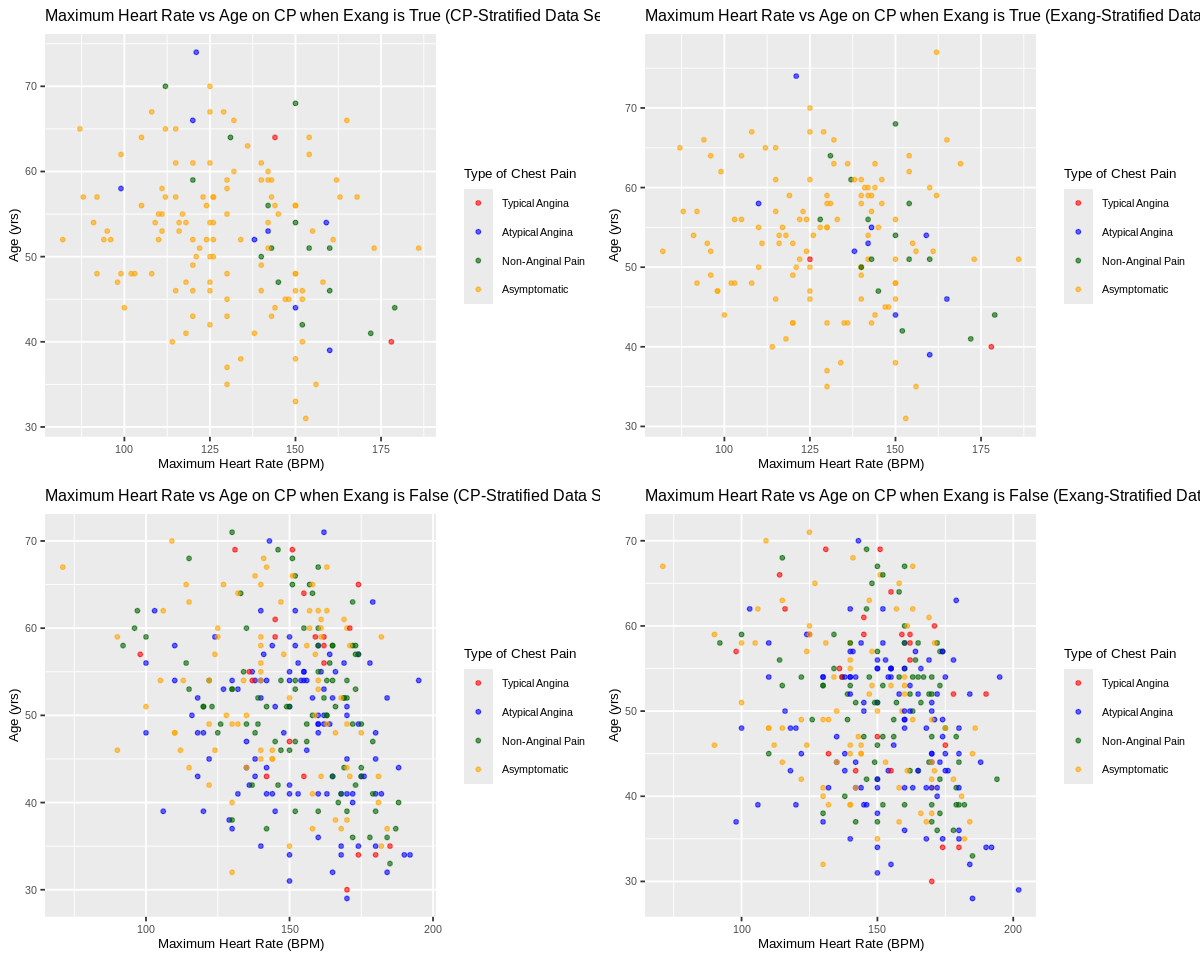

In [12]:
options(repr.plot.width=10, repr.plot.height=8)

"Figure 9: Panel of Scatterplots of Maximum Heart Rate vs Age for each Class of Exang and each Training Data Set"
panel1 <- plot_grid(cp_plot_exang_true,
                   exang_plot_exang_true,
                   cp_plot_exang_false,
                   exang_plot_exang_false,
                   nrow = 2, 
                   ncol = 2)
panel1

In [13]:
set.seed(9999)

# Male

cp_heart_train_male <- cp_heart_train |>
    filter(sex == 1)

cp_vfold_male <- vfold_cv(cp_heart_train_male, v = 5, strata = cp)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

cp_recipe_male <- recipe(cp ~ thalach + age, data = cp_heart_train_male) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

k_lots <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

cp_result_male <- workflow() |>
    add_recipe(cp_recipe_male) |>
    add_model(knn_tune) |>
    tune_grid(resamples = cp_vfold_male, grid = k_lots) |>
    collect_metrics()

cp_accuracies_male <- cp_result_male |>
    filter(.metric == "accuracy")

cp_accuracies_plot_male <- ggplot(cp_accuracies_male, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Amount of Nearest Neighbors Considered", y = "Accuracy") +
        ggtitle("Neighbors vs Accuracy for Chest Pain Types (Males)") +
        theme(text = element_text(size = 8))

# Female

cp_heart_train_female <- cp_heart_train |>
    filter(sex == 0)

cp_vfold_female <- vfold_cv(cp_heart_train_female, v = 5, strata = cp)

cp_recipe_female <- recipe(cp ~ thalach + age, data = cp_heart_train_female) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

cp_result_female <- workflow() |>
    add_recipe(cp_recipe_female) |>
    add_model(knn_tune) |>
    tune_grid(resamples = cp_vfold_female, grid = k_lots) |>
    collect_metrics()

cp_accuracies_female <- cp_result_female |>
    filter(.metric == "accuracy")

cp_accuracies_plot_female <- ggplot(cp_accuracies_female, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Amount of Nearest Neighbors Considered", y = "Accuracy") +
        ggtitle("Neighbors vs Accuracy for Chest Pain Types (Females)") +
        theme(text = element_text(size = 8))

→ A | warning: No observations were detected in `truth` for level(s): '1'
               Computation will proceed by ignoring those levels.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2





[1] "Figure 10: Panel of Line Plots of Amount of Neighbors Considered vs Accuracy per Sex for Chest Pain Type"

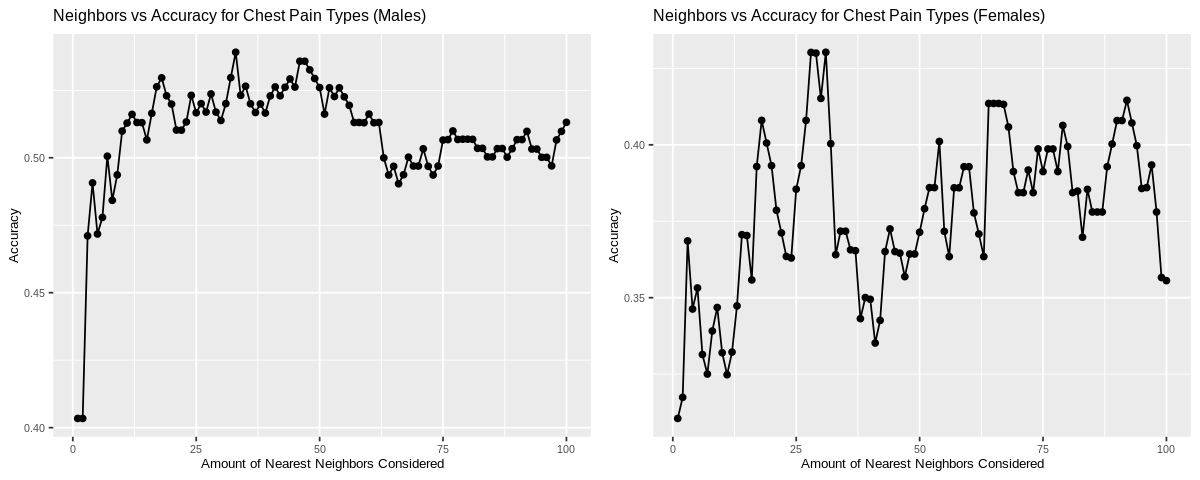

In [14]:
options(repr.plot.width=10, repr.plot.height=4)

"Figure 10: Panel of Line Plots of Amount of Neighbors Considered vs Accuracy per Sex for Chest Pain Type"
panel2 <- plot_grid(cp_accuracies_plot_male,
                   cp_accuracies_plot_female,
                   nrow = 1, 
                   ncol = 2)
panel2

In [15]:
cp_spec_male <- nearest_neighbor(weight_func = "rectangular", neighbors = 33) |>
    set_engine("kknn") |>
    set_mode("classification")

cp_fit_male <- workflow() |>
    add_recipe(cp_recipe_male) |>
    add_model(cp_spec_male) |>
    fit(data = cp_heart_train_male)

cp_heart_test_male <- cp_heart_test |>
    filter(sex == 1)

cp_predictions_male <- predict(cp_fit_male, cp_heart_test_male) |>
    bind_cols(cp_heart_test_male)

cp_confusion_male <- cp_predictions_male |>
    conf_mat(truth = cp, estimate = .pred_class)

"Figure 11.1: Confusion Matrix of Male Chest Pain Type"
cp_confusion_male

[1] "Figure 11.1: Confusion Matrix of Male Chest Pain Type"

          Truth
Prediction  1  2  3  4
         1  0  0  0  0
         2  0  5  1  0
         3  5 10  5  8
         4  4 12 16 43

In [27]:
cp_model_accuracy_male <- cp_predictions_male |>
    metrics(truth = cp, estimate = .pred_class) |>
    filter(.metric == "accuracy")

"Figure 11.2: Model Accuracy of Male Chest Pain Type"
cp_model_accuracy_male

[1] "Figure 11.2: Model Accuracy of Male Chest Pain Type"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4862385


In [28]:
cp_spec_female <- nearest_neighbor(weight_func = "rectangular", neighbors = 30) |>
    set_engine("kknn") |>
    set_mode("classification")

cp_fit_female <- workflow() |>
    add_recipe(cp_recipe_female) |>
    add_model(cp_spec_female) |>
    fit(data = cp_heart_train_female)

cp_heart_test_female <- cp_heart_test |>
    filter(sex == 0)

cp_predictions_female <- predict(cp_fit_female, cp_heart_test_female) |>
    bind_cols(cp_heart_test_female)

cp_confusion_female <- cp_predictions_female |>
    conf_mat(truth = cp, estimate = .pred_class)

"Figure 11.3: Confusion Matrix of Female Chest Pain Type"
cp_confusion_female

[1] "Figure 11.3: Confusion Matrix of Female Chest Pain Type"

          Truth
Prediction  1  2  3  4
         1  0  0  0  0
         2  0 11  7  4
         3  1  0  1  1
         4  1  1  4 11

In [29]:
cp_model_accuracy_female <- cp_predictions_female |>
    metrics(truth = cp, estimate = .pred_class) |>
    filter(.metric == "accuracy")

"Figure 11.4: Model Accuracy of Female Chest Pain Type"
cp_model_accuracy_female

[1] "Figure 11.4: Model Accuracy of Female Chest Pain Type"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.547619


In [17]:
set.seed(9999)

# Male

exang_heart_train_male <- exang_heart_train |>
    filter(sex == 1)

exang_vfold_male <- vfold_cv(exang_heart_train_male, v = 5, strata = exang)

exang_recipe_male <- recipe(exang ~ thalach + age, data = exang_heart_train_male) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

exang_result_male <- workflow() |>
    add_recipe(exang_recipe_male) |>
    add_model(knn_tune) |>
    tune_grid(resamples = exang_vfold_male, grid = k_lots) |>
    collect_metrics()

exang_accuracies_male <- exang_result_male |>
    filter(.metric == "accuracy")

exang_accuracies_plot_male <- ggplot(exang_accuracies_male, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Amount of Nearest Neighbors Considered", y = "Accuracy") +
        ggtitle("Neighbors vs Accuracy for Exercise-Induced Angina (Males)") +
        theme(text = element_text(size = 8))

# Female

exang_heart_train_female <- exang_heart_train |>
    filter(sex == 0)

exang_vfold_female <- vfold_cv(exang_heart_train_female, v = 5, strata = exang)

exang_recipe_female <- recipe(exang ~ thalach + age, data = exang_heart_train_female) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

exang_result_female <- workflow() |>
    add_recipe(exang_recipe_female) |>
    add_model(knn_tune) |>
    tune_grid(resamples = exang_vfold_female, grid = k_lots) |>
    collect_metrics()

exang_accuracies_female <- exang_result_female |>
    filter(.metric == "accuracy")

exang_accuracies_plot_female <- ggplot(exang_accuracies_female, aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "Amount of Nearest Neighbors Considered", y = "Accuracy") +
        ggtitle("Neighbors vs Accuracy for Exercise-Induced Angina (Females)") +
        theme(text = element_text(size = 8))

→ A | warning: 100 samples were requested but there were 100 rows in the data. 95 will be used.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

→ B | warning: 100 samples were requested but there were 101 rows in the data. 96 will be used.

There were issues with some computations   A: x2
There were issues with some computations   A: x2   B: x1

→ C | warning: 100 samples were requested but there were 102 rows in the data. 97 will be used.

There were issues with some computations   A: x2   B: x1
There were issues with some computations   A: x2   B: x2   C: x1

There were issues with some computations   A: x2   B: x2   C: x1





[1] "Figure 12: Panel of Line Plots of Amount of Neighbors Considered vs Accuracy per Sex for Exercise-Induced Angina"

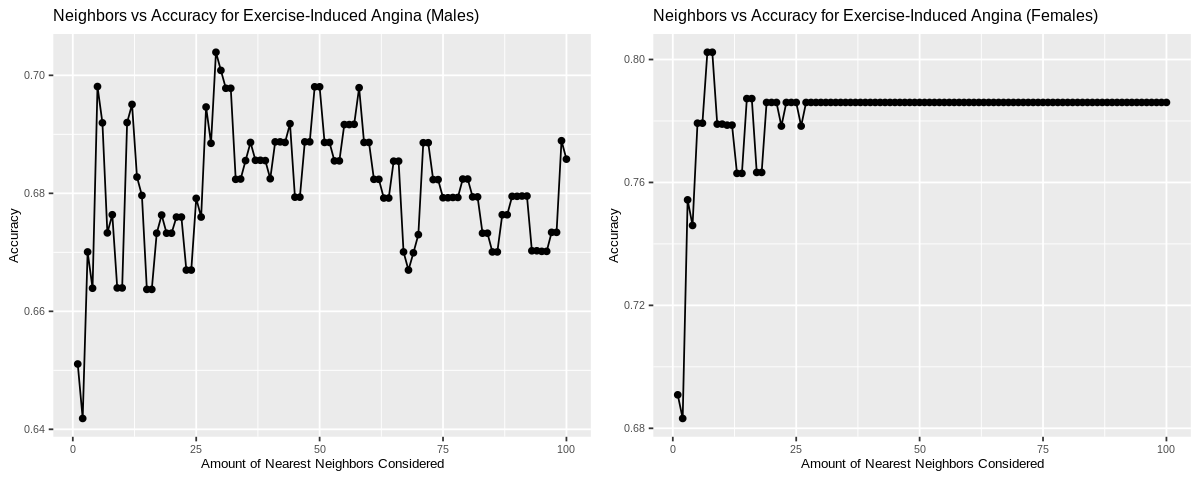

In [18]:
options(repr.plot.width=10, repr.plot.height=4)

"Figure 12: Panel of Line Plots of Amount of Neighbors Considered vs Accuracy per Sex for Exercise-Induced Angina"
panel3 <- plot_grid(exang_accuracies_plot_male,
                   exang_accuracies_plot_female,
                   nrow = 1, 
                   ncol = 2)
panel3

In [19]:
exang_spec_male <- nearest_neighbor(weight_func = "rectangular", neighbors = 29) |>
    set_engine("kknn") |>
    set_mode("classification")

exang_fit_male <- workflow() |>
    add_recipe(exang_recipe_male) |>
    add_model(exang_spec_male) |>
    fit(data = exang_heart_train_male)

exang_heart_test_male <- exang_heart_test |>
    filter(sex == 1)

exang_predictions_male <- predict(exang_fit_male, exang_heart_test_male) |>
    bind_cols(exang_heart_test_male)

exang_confusion_male <- exang_predictions_male |>
    conf_mat(truth = exang, estimate = .pred_class)

"Figure 13.1: Confusion Matrix of Male Exercise-Induced Angina"
exang_confusion_male

[1] "Figure 13.1: Confusion Matrix of Male Exercise-Induced Angina"

          Truth
Prediction  0  1
         0 49 15
         1 12 22

In [30]:
exang_model_accuracy_male <- exang_predictions_male |>
    metrics(truth = exang, estimate = .pred_class) |>
    filter(.metric == "accuracy")

"Figure 13.2: Model Accuracy of Male Exercise-Induced Angina"
exang_model_accuracy_male

[1] "Figure 13.2: Model Accuracy of Male Exercise-Induced Angina"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7244898


In [32]:
exang_spec_female <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) |>
    set_engine("kknn") |>
    set_mode("classification")

exang_fit_female <- workflow() |>
    add_recipe(exang_recipe_female) |>
    add_model(exang_spec_female) |>
    fit(data = exang_heart_train_female)

exang_heart_test_female <- exang_heart_test |>
    filter(sex == 0)

exang_predictions_female <- predict(exang_fit_female, exang_heart_test_female) |>
    bind_cols(exang_heart_test_female)

exang_confusion_female <- exang_predictions_female |>
    conf_mat(truth = exang, estimate = .pred_class)

"Figure 13.3: Confusion Matrix of Female Exercise-Induced Angina"
exang_confusion_female

[1] "Figure 13.3: Confusion Matrix of Female Exercise-Induced Angina"

          Truth
Prediction  0  1
         0 36  8
         1  5  2

In [33]:
exang_model_accuracy_female <- exang_predictions_female |>
    metrics(truth = exang, estimate = .pred_class) |>
    filter(.metric == "accuracy")

"Figure 13.4: Model Accuracy of Female Exercise-Induced Angina"
exang_model_accuracy_female

[1] "Figure 13.4: Model Accuracy of Female Exercise-Induced Angina"

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.745098


### 3. Discussion

[]

### 4. References

[]